## Supervised Learning Project
#### In this project, the objective is to predict the likelihood of a liability customer buying personal loans at Thera Bank.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
# importing plotting libraries
import matplotlib.pyplot as plt
# to enable plotting graphs in Jupyter notebook
%matplotlib inline
# importing Seaborn for statistical visualizations
import seaborn as sb
# importing logistic regression and stats modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from os import system

C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [90]:
# Importing dataset
thera = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [46]:
# Checking datatypes
thera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [47]:
# Checking shape
thera.shape

(5000, 14)

Insights: According to the dataset info and shape, there are no null values present.

In [48]:
# Displaying statistical summary
thera.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [49]:
# Removing ID and ZIP Code columns as they might throw off data analysis
thera = thera.drop(['ID', 'ZIP Code'], axis=1)
thera

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [50]:
# Imputing 0 and negative values on columns having continuous values (excluding columns with categorical values of 0 or 1)
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy='mean')
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education']
imputer = rep_0.fit(thera[cols])
thera[cols] = imputer.transform(thera[cols])

for col in thera.columns:
    thera[col][thera[col] < 0] = thera[col].mean()

In [51]:
# Verifying all 0 values have been removed
if thera[cols].values.any() == 0:
    print("There are 0 values.")
else:
    print("No 0 values")
    
# Verifying all negative values have been removed
if thera[cols].values.any() < 0:
    print("There are negative values.")
else:
    print("No negative values.")

No 0 values
No negative values.


Based on the above analysis after imputing 0 values on the appropriate columns, there are no remaining 0 values.

## Exploratory Data Analysis
### Studying data distribution in each attribute and target variable

In [52]:
# Checking number of unique values in each column
thera.nunique()

Age                    45
Experience             45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [53]:
# Checking number of people with zero mortgage
print("There are " + str(len(thera[thera['Mortgage'] == 0])) + " people with zero mortgage.")

There are 3462 people with zero mortgage.


In [41]:
# Checking number of people with zero credit card spending per month
print("There are " + str(len(thera[thera['CCAvg'] == 0])) + " people with zero credit card spending per month.")

There are 0 people with zero credit card spending per month.


In [54]:
# Checking value counts of categorical columns
for i in ['Family', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    print(thera[i].value_counts())
    print()

1.0    1472
2.0    1296
4.0    1222
3.0    1010
Name: Family, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



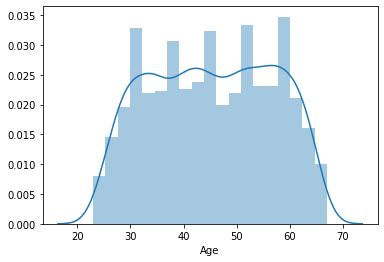

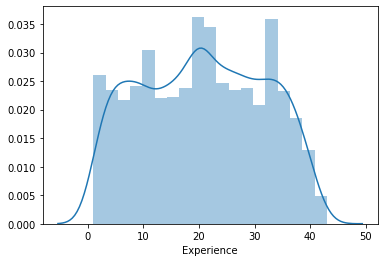

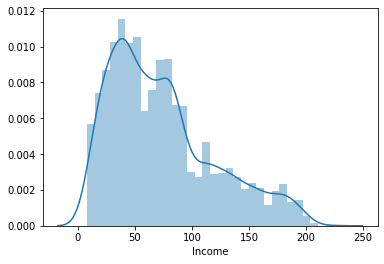

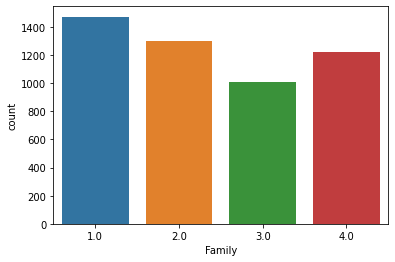

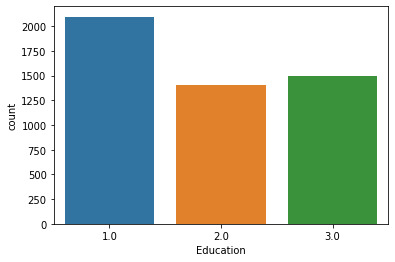

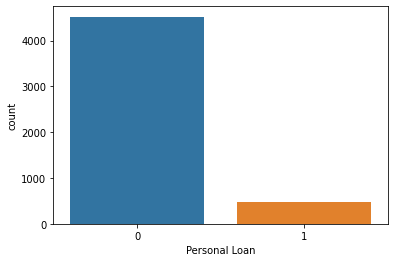

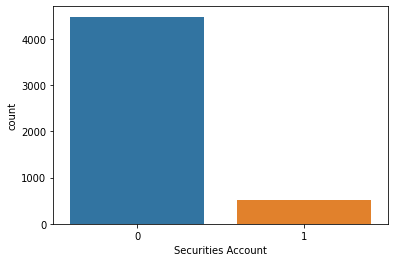

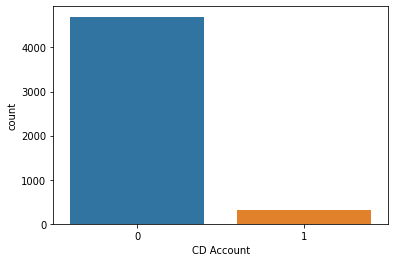

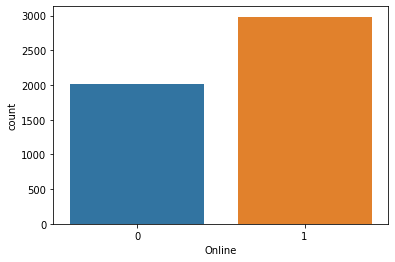

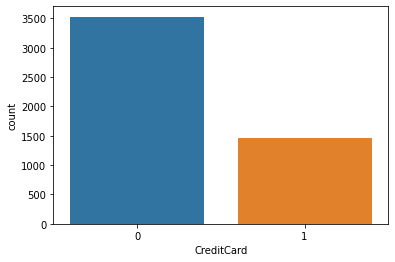

In [55]:
# Plotting univariate visualizations
for i in thera.columns[:3]:
    sb.distplot(thera[i])
    plt.show()
    
sb.countplot(thera['Family'])
plt.show()

sb.countplot(thera['Education'])
plt.show()
    
for i in thera.columns[7:]:
    sb.countplot(thera[i])
    plt.show()

<AxesSubplot:xlabel='Personal Loan', ylabel='Income'>

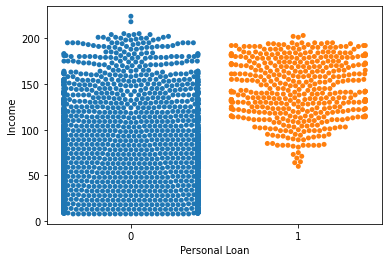

In [56]:
# Displaying swarmplot showing relationship between income and personal loan columns
sb.swarmplot(thera['Personal Loan'], thera['Income'])

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

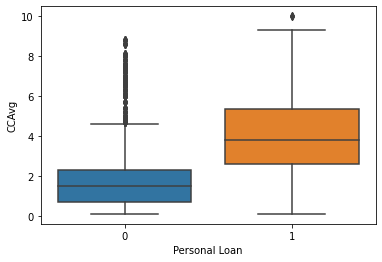

In [16]:
# Displaying swarmplot showing relationship between CCAvg and personal loan columns
sb.boxplot(thera['Personal Loan'], thera['CCAvg'])

<AxesSubplot:xlabel='Personal Loan', ylabel='Experience'>

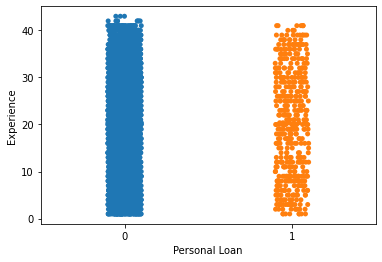

In [60]:
# Displaying stripplot showing relationship between experience and personal loan columns
sb.stripplot(thera['Personal Loan'], thera['Experience'])

In [17]:
# Displaying mean and median values with respect to personal loan status
thera_ = thera.copy()
thera_ = thera_.drop(['Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'], axis=1)
thera_.groupby(['Personal Loan']).mean()

,Age,Experience,Income,Family,CCAvg,Education
Personal Loan,,,,,,
0,45.367257,20.398239,66.237389,2.373451,1.775002,1.843584
1,45.066667,20.140864,144.745833,2.612500,3.909479,2.233333


In [18]:
thera_.groupby(['Personal Loan']).median()

,Age,Experience,Income,Family,CCAvg,Education
Personal Loan,,,,,,
0,45.0,20.373531,59.0,2.0,1.5,2.0
1,45.0,20.000000,142.5,3.0,3.8,2.0


# Observations

### Age and experience seem to follow a normal distribution in this dataset, while income, CCAvg, and mortgage are positively skewed.

### Family size and education are fairly evenly distributed.

### Most customers did not take a personal loan, securities account, or CD account.

### More than twice as many customers do not use a credit card issued by the bank as those who do use one.

### Customers with a higher income tend to take more personal loans than those who have a lower income.

### Customers with a lower credit card spending average per month are less likely to take personal loans than those who have a higher credit card spending average per month.

### Experience does not seem to be a significant determiner of whether or not a customer will take a personal loan.

### Median age regardless of personal loan status: 45

In [91]:
# Preparing data model
thera = pd.get_dummies(thera, columns=['Education'])
X = thera.drop('Personal Loan', axis=1)
Y = thera['Personal Loan'].astype('category')

X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,1,0,1,0


In [92]:
# Splitting data into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=7)

In [93]:
X_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
717,718,59,34,94,93940,3,0.5,0,0,0,0,1,1,0,0
2496,2497,63,37,32,93117,3,0.7,141,0,0,0,0,0,1,0
2469,2470,43,18,89,92780,1,0.1,307,0,0,0,1,0,1,0
1375,1376,50,26,179,92612,1,2.9,0,0,0,0,1,0,0,1
2742,2743,39,14,89,95762,2,0.4,0,0,0,1,0,1,0,0


In [94]:
# Checking shape of data and mean values

print(X_train.shape)
print(X_test.shape)
print(Y_train.astype('int').mean())
print(Y_test.astype('int').mean())

(3500, 15)
(1500, 15)
0.09771428571428571
0.092


In [95]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

model = LogisticRegression(random_state=7)
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
# Setting Y prediction variable
Y_predict = model.predict(X_test)

In [97]:
print(Y_test)
print(Y_predict)

3406    0
757     0
3624    0
4544    0
3235    0
       ..
460     0
2492    0
3028    0
3437    0
4579    0
Name: Personal Loan, Length: 1500, dtype: category
Categories (2, int64): [0, 1]
[0 0 0 ... 0 0 0]


In [98]:
# Creating new dataframe with columns for observed/predicted personal loan status

z = X_test.copy()
z['Observed Personal Loan Status'] = Y_test
z['Predicted Personal Loan Status'] = Y_predict
z.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Observed Personal Loan Status,Predicted Personal Loan Status
3406,3407,42,12,34,92177,3,2.0,0,0,0,0,1,0,0,1,0,0
757,758,52,28,81,91745,3,1.8,0,1,0,0,0,0,1,0,0,0
3624,3625,58,28,70,92028,1,1.4,0,0,0,0,0,0,0,1,0,0
4544,4545,28,4,80,95819,3,2.5,0,0,0,1,0,1,0,0,0,0
3235,3236,60,35,39,91711,2,1.6,0,0,0,1,0,0,0,1,0,0


In [99]:
# Creating function to draw confusion matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sb.heatmap(cm, annot=True, fmt='.2f', xticklabels= [0,1], yticklabels = [0,1])
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()

Training Accuracy:  0.9057142857142857
Testing Accuracy:  0.916

Confusion Matrix


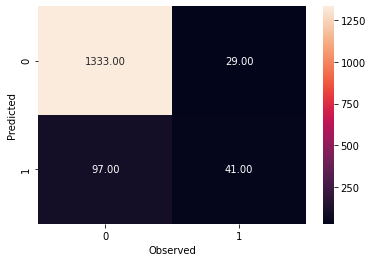

None

Recall:  0.2971014492753623
Precision:  0.5857142857142857
F1:  0.3942307692307692
ROC AUC:  0.6379046159739513


In [100]:
# Printing training/testing accuracy, confusion matrix, and metrics evaluating model performance
print("Training Accuracy: ", model.score(X_train, Y_train))
print("Testing Accuracy: ", model.score(X_test, Y_test))
print()
print("Confusion Matrix")
print(draw_cm(Y_test, Y_predict))
print()
print("Recall: ", recall_score(Y_test, Y_predict))
print("Precision: ", precision_score(Y_test, Y_predict))
print("F1: ", f1_score(Y_test, Y_predict))
print("ROC AUC: ", roc_auc_score(Y_test, Y_predict))

### True Positives: 41
### False Positives: 97
### True Negatives: 1333
### False Negatives: 29

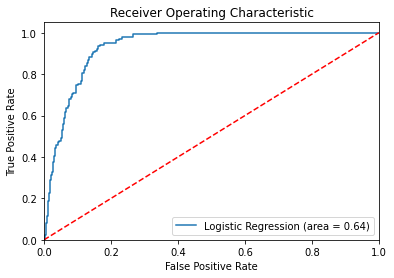

In [101]:
# Drawing ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])

def draw_roc(logit_roc_auc, fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.savefig('Log_ROC')
    plt.show()
    
draw_roc(logit_roc_auc, fpr, tpr)

In [102]:
# Feature importance or coefficients

fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]), 2)
fi.sort_values(by = 'Coeff', ascending=False)

,Col,Coeff
3,Income,0.03
1,Age,0.01
2,Experience,0.01
5,Family,0.01
6,CCAvg,0.01
12,Education_1,0.01
0,ID,0.00
4,ZIP Code,0.00
7,Mortgage,0.00
8,Securities Account,0.00


In [103]:
# Displaying test data where predicted class and observed class do not match

z = X_test.copy()
z['Observed Loan Status'] = Y_test
z['Predicted Loan Status'] = Y_predict

z_filtered = z[z['Observed Loan Status'] != z['Predicted Loan Status']]
z_filtered

print(z.shape)
print(z_filtered.shape)

(1500, 17)
(126, 17)


# Conclusion

### According to the metrics, the model receives an F1 score of 0.39 and an AUC score of 0.64. Also, 126 out of 1500 customers received an incorrect prediction. Therefore, the model is fairly accurate, but there is room for improvement.